In [ ]:
#from sympy import init_printing; init_printing(use_latex='mathjax') imprimir en formato teX, para derivar e integrar

In [2]:
# Librería para cálculo numérico
import numpy as np

# Valores dados en el enunciado
C_0, meta, i = 10000, 11000, 0.008
# Despejamos k tal que C_k=meta
k = np.ceil((meta/C_0 - 1)/i)   # Notar el uso de la función ceil (no se puede tener un número no entero de periodos)
k = k.astype(int)               # Conversión a entero (para visualización)
C_k = C_0*(1+k*i)               # Cálculo del capital al final del periodo k
C_k = round(C_k, 2)             # Redondeo con dos cifras decimales

# Imprimimos respuesta en pantalla
print("El número de periodos que se debe dejar invertido el dinero es ", k,". Al final del periodo ", k,
      ", el capital es ", C_k, ".", sep="")

El número de periodos que se debe dejar invertido el dinero es 13. Al final del periodo 13, el capital es 11040.0.


In [4]:
# Librería para cálculo numérico
import numpy as np

# Valores dados en el enunciado
C_0, meta, i = 10000, 12000, 0.001
# Despejamos k tal que C_k=meta
k = np.ceil((meta/C_0 - 1)/i)   # Notar el uso de la función ceil (no se puede tener un número no entero de periodos)
k = k.astype(int)               # Conversión a entero (para visualización)
C_k = C_0*(1+k*i)               # Cálculo del capital al final del periodo k
C_k = round(C_k, 2)             # Redondeo con dos cifras decimales

# Imprimimos respuesta en pantalla
print("El número de periodos que se debe dejar invertido el dinero es ", k,". Al final del periodo ", k,
      ", el capital es ", C_k, ".", sep="")

El número de periodos que se debe dejar invertido el dinero es 200. Al final del periodo 200, el capital es 12000.0.


Ejemplo. Suponga que se tiene un capital de \$10000 MXN, el cual se pone en un fondo de inversión que paga una tasa de interés del 0.8% mensual.
Si se tiene una meta de ahorro de \$11000 MXN sin inversiones adicionales, ¿cuántos meses se debería dejar invertido el dinero?
Muestre una gráfica que ilustre la situación.

In [26]:
%matplotlib inline 

C:\Users\LARP\ANACONDA\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


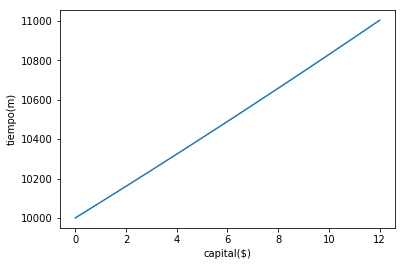

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
P=10000
i=.008
F=11000
t=round(np.log(F/P)/np.log(1+i))
tt = np.linspace(0,t,t+1)
FF = P*(1+i)**tt
plt.figure(num=1); plt.clf()
plt.plot(tt,FF)
plt.xlabel('capital($)')                         # Etiqueta eje x
plt.ylabel('tiempo(m)')
interact_manual(interes_compuesto, C_0=fixed(10000), meta=(10000,12000,100), i=fixed(0.008));



SyntaxError: invalid syntax (<ipython-input-38-6b9c974ca09c>, line 11)

In [42]:
# Librería de análisis de datos
import pandas as pd
# Librería para manipulación de fechas
from datetime import date

# Datos para la cuenta de ahorro
Tasa_interes = 0.1
Anos = 2
Abonos_ano = 12
Inicial = 10000
Meta = 100000
fecha_inicio = (date(2018,1,31))

# Cálculo de abonos mensuales iguales para llegar a la meta de ahorro en el tiempo deseado
Abono = (Tasa_interes/Abonos_ano)*(Meta - Inicial*(1+Tasa_interes/Abonos_ano)**(Anos*Abonos_ano))/((1+Tasa_interes/Abonos_ano)**(Anos*Abonos_ano)-1)

# Rango de fechas en la tabla
rng = pd.date_range(fecha_inicio, periods=Anos*Abonos_ano, freq='MS')
rng.name = "Fecha del abono"

# Columnas de abonos y extracto de cuenta en las fechas respectivas
df = pd.DataFrame(index=rng,columns=['Abono', 'Balance'], dtype='float')
df.reset_index(inplace=True)
df.index += 1
df.index.name = "Periodo"  # Columna correspondiente al periodo

# Los abonos son iguales
df["Abono"] = Abono

# Vector indizador de los periodos de los abonos
index_vector = np.arange(1,len(rng)+1)
# Extracto de la cuenta mes a mes
df["Balance"] = Inicial*(1+Tasa_interes/Abonos_ano)**index_vector+Abono*(((1+Tasa_interes/Abonos_ano)**index_vector-1)/(Tasa_interes/Abonos_ano))

# Redondear con dos cifras decimales
df = df.round(2)
df

# La siguiente solución es también válida. Sin embargo, evitar el uso de 'for'

#df.loc[1, "Balance"] = Inicial*(1+Tasa_interes/Abonos_ano)**1 + df.loc[1, "Abono"]

#for i in range(2, len(df)+1):
#    # Get the previous balance as well as current payments
#    prev_balance = df.loc[i-1, "Balance"]

#    df.loc[i, "Balance"] = prev_balance*(1+Tasa_interes/Abonos_ano)**1 + df.loc[i, "Abono"]

,Fecha del abono,Abono,Balance
Periodo,,,
1,2018-02-01,3319.71,13403.04
2,2018-03-01,3319.71,16834.45
3,2018-04-01,3319.71,20294.44
4,2018-05-01,3319.71,23783.27
5,2018-06-01,3319.71,27301.18
6,2018-07-01,3319.71,30848.40
7,2018-08-01,3319.71,34425.18
8,2018-09-01,3319.71,38031.76
9,2018-10-01,3319.71,41668.40


In [47]:
!cd

C:\Users\LARP\OneDrive - ITESO\INGENIERIA FINANCIERA\3 semestre\Simulacion Matemática\ARCHIVOS GITHUB\advinansa\advinansa


In [45]:
!pwd

"pwd" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [46]:
excel= pd.ExcelWriter("TablaAbonos,xlsx")
df.to_excel(excel,'hoja 1')
excel.save()

ValueError: No engine for filetype: ''

In [ ]:
eqn=

https://render.githubusercontent.com/render/math?math=%5Cfrac%7Bd%20C%28t%29%7D%7Bdt%7D%3Dr%5C%3B%20C%28t%29%2C&mode=display